In [1]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
from keras import layers, models
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras import optimizers
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from pathlib import Path
import pandas as pd
from skimage.io import imread
from tensorflow.keras.optimizers import SGD

In [2]:
data_dir = Path('D:\Git\Research Paper\DataSet - Mehedi Hasan, Medical Technologist, Bangladesh Hospitals\Project')
train_dir = data_dir / 'Train'
test_dir = data_dir / 'Test'

In [3]:
normal_cases_dir = train_dir / 'Normal'
Stone_cases_dir = train_dir / 'Stone'

In [4]:
normal_cases = normal_cases_dir.glob('*.*')
Stone_cases = Stone_cases_dir.glob('*.*')

In [5]:
train_data = []

for img in normal_cases:
    train_data.append((img,0))

for img in Stone_cases:
    train_data.append((img,1))

In [6]:
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data.head()

,image,label
0,"D:\Git\Research Paper\DataSet - Mehedi Hasan, ...",1
1,"D:\Git\Research Paper\DataSet - Mehedi Hasan, ...",0
2,"D:\Git\Research Paper\DataSet - Mehedi Hasan, ...",0
3,"D:\Git\Research Paper\DataSet - Mehedi Hasan, ...",0
4,"D:\Git\Research Paper\DataSet - Mehedi Hasan, ...",0


In [7]:
train_data.shape

(8132, 2)

0    6030
1    2102
Name: label, dtype: int64


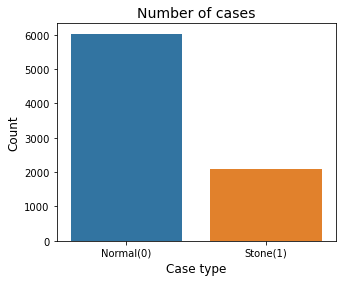

In [8]:
cases_count = train_data['label'].value_counts()
print(cases_count)

plt.figure(figsize=(5,4))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Stone(1)'])
plt.show()

In [9]:
Normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
Stone_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
samples = Normal_samples+Stone_samples
#del Normal_samples, Stone_samples

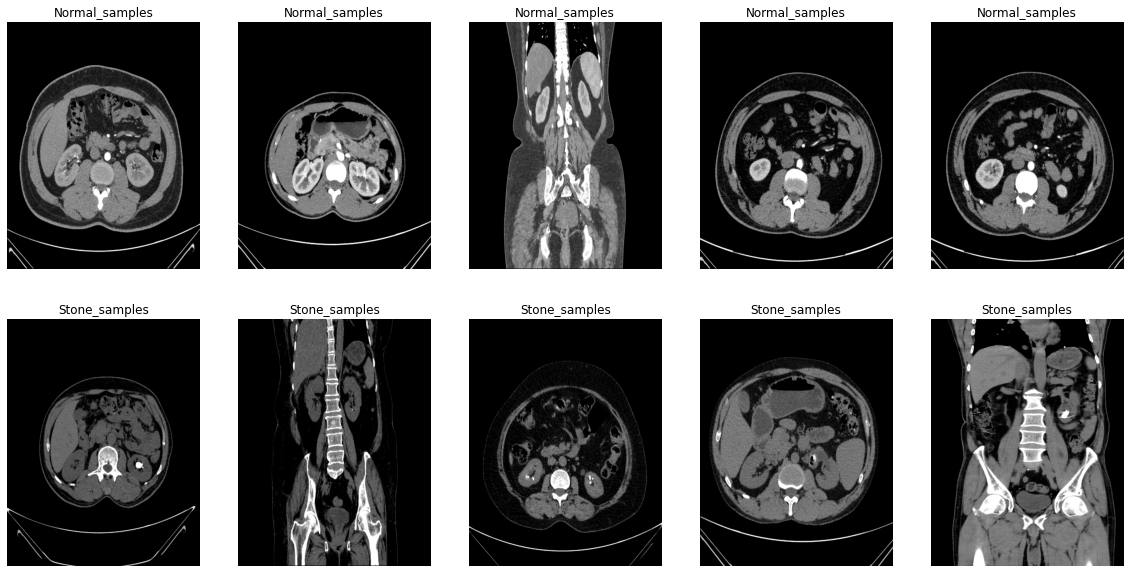

In [10]:
f, ax = plt.subplots(2,5, figsize=(20,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Stone_samples")
      
        
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [50]:
normal_cases_dir = train_dir / 'Normal'
Stone_cases_dir = train_dir / 'Stone'

normal_cases = normal_cases_dir.glob('*.*')
Stone_cases = Stone_cases_dir.glob('*.*')

train_data = []
train_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (100,100))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label ='Normal'
    train_data.append(img)
    train_labels.append(label)

for img in Stone_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (100,100))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Stone'
    train_data.append(img)
    train_labels.append(label)    

In [51]:
train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (8132, 100, 100, 3)
Total number of labels: (8132,)


In [52]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal


In [14]:
train_labels1['label'].unique()

array(['Normal', 'Stone'], dtype=object)

In [53]:


train_labels1['label']=train_labels1['label'].map({'Normal':0,
                                                   'Stone':1
                                                  })



In [54]:
print(train_data1.shape)
print(train_labels1.shape)

(8132, 100, 100, 3)
(8132, 1)


In [18]:
train_data1 = train_data1.reshape(-1, 28, 28, 3)

ValueError: cannot reshape array of size 548910000 into shape (28,28,3)

In [17]:
train_labels1.isnull().sum()

label    0
dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

In [55]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = ada.fit_resample(train_data1, train_labels1)

1    6090
0    6030
Name: label, dtype: int64


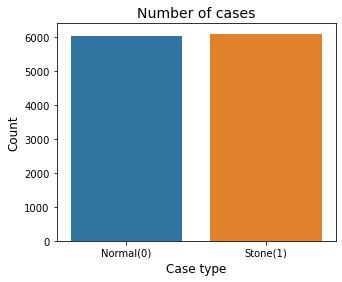

In [56]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

plt.figure(figsize=(5,4))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Stone(1)'])
plt.show()

In [57]:
train_data2.shape

(12120, 30000)

In [58]:
train_data2 = train_data2.reshape(-1, 100, 100, 3)


In [59]:
train_data2.shape

(12120, 100, 100, 3)

In [35]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [60]:
data = np.array(train_data2, dtype="float") / 255.0
# encode the labels (which are currently strings) as integers and then
# one-hot encode them
#le = LabelEncoder()
#labels = le.fit_transform(train_labels2)
#labels = to_categorical(labels, 2)

In [62]:
data.shape

(12120, 100, 100, 3)

In [65]:
train_labels2.shape

(12120, 1)

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, train_labels2, test_size=0.2, random_state=42)

In [67]:
x_train.shape

(9696, 100, 100, 3)

In [69]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.8)
opt = keras.optimizers.Adagrad(learning_rate=lr_schedule)

In [70]:
from tensorflow.keras.applications import VGG19
base = VGG19(weights='imagenet',
                  include_top=False, #removing the dense layers
                  input_shape=(100,100,3))


model = models.Sequential()
model.add(base)

In [71]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 3, 3, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               1179904   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)               30840     
                                                                 
 dropout_7 (Dropout)         (None, 120)               0         
                                                                 
 dense_10 (Dense)            (None, 10)               

In [73]:
batch_size = 64
learnR = 1e-3
Epoch = 50

In [74]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
	                                zoom_range=0.02,
		                            width_shift_range=0.2,
		                            height_shift_range=0.2,
									samplewise_center = True,
									#samplewise_std_normalization=True,
		                            shear_range=0.15,
		                            horizontal_flip=True,
		                            fill_mode="nearest",
									validation_split=0.2)

In [75]:
train_set = train_datagen.flow(x_train, y_train,batch_size=batch_size,shuffle=True)
validation_set = train_datagen.flow(x_test, y_test, batch_size=batch_size,shuffle=True)

In [76]:
history = model.fit(train_set,
                    #steps_per_epoch=,                                
                    epochs=Epoch,
                    batch_size=batch_size,
                    #class_weight = class_weight,
                    #callbacks = [callback],
                    #verbose = 0,
                    validation_data=validation_set)

Epoch 1/50
152/152 [==============================] - 122s 634ms/step - loss: 0.6953 - accuracy: 0.4898 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 2/50
152/152 [==============================] - 91s 596ms/step - loss: 0.6937 - accuracy: 0.2307 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 3/50
152/152 [==============================] - 89s 587ms/step - loss: 0.6933 - accuracy: 0.2135 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 4/50
152/152 [==============================] - 88s 576ms/step - loss: 0.6932 - accuracy: 0.1485 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 5/50
152/152 [==============================] - 91s 599ms/step - loss: 0.6934 - accuracy: 0.1237 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 6/50
152/152 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.0998